# Vancouver Crime Exploratory Data Analysis

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [18]:
df = pd.read_csv("data/crime_records.csv")
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.000000,5.453433e+06
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.964805,5.457110e+06
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.779775,5.459174e+06
3,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.943352,5.459166e+06
4,Break and Enter Commercial,2005,11,14,3,9,10XX ALBERNI ST,West End,491021.385727,5.459161e+06


In [19]:
# Check if there is any missing value
# Print the percentage of the rows with missing values
print(df.isna().sum())
print(df.isna().sum()*100/len(df))

TYPE                 0
YEAR                 0
MONTH                0
DAY                  0
HOUR                 0
MINUTE               0
HUNDRED_BLOCK       13
NEIGHBOURHOOD    64962
X                  120
Y                  120
dtype: int64
TYPE              0.000000
YEAR              0.000000
MONTH             0.000000
DAY               0.000000
HOUR              0.000000
MINUTE            0.000000
HUNDRED_BLOCK     0.002083
NEIGHBOURHOOD    10.409943
X                 0.019230
Y                 0.019230
dtype: float64


In [20]:
# Size of dataset
df.shape

(624038, 10)

In [21]:
# Get summary statistics
df.describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,X,Y
count,624038.000000,624038.000000,624038.000000,624038.000000,624038.000000,623918.000000,6.239180e+05
mean,2010.538004,6.524269,15.389496,12.346011,15.401466,443054.518110,4.911580e+06
std,5.166660,3.388705,8.744227,7.612785,18.252890,147627.399733,1.636310e+06
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2006.000000,4.000000,8.000000,6.000000,0.000000,490023.749134,5.453771e+06
50%,2010.000000,7.000000,15.000000,14.000000,3.000000,491528.021104,5.456911e+06
75%,2015.000000,9.000000,23.000000,19.000000,30.000000,493487.643925,5.458686e+06
max,2019.000000,12.000000,31.000000,23.000000,59.000000,511303.000000,5.512579e+06


In [22]:
# Examine missing data in neighborhood
df.loc[df['NEIGHBOURHOOD'].isna()]

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
38807,Break and Enter Commercial,2007,9,23,18,5,X NK_LOC ST,NaN,492757.48676,5.458792e+06
38808,Break and Enter Commercial,2007,11,1,14,38,X NK_LOC ST,NaN,492757.48676,5.458792e+06
38809,Break and Enter Commercial,2005,5,18,18,30,"X NK_LOC ST ""SQUAMISH""",NaN,492757.48676,5.458792e+06
105232,Break and Enter Residential/Other,2004,6,3,14,20,X NK_LOC ST,NaN,492757.48676,5.458792e+06
105233,Break and Enter Residential/Other,2008,3,13,7,0,X NK_LOC ST,NaN,492757.48676,5.458792e+06
...,...,...,...,...,...,...,...,...,...,...
622605,Vehicle Collision or Pedestrian Struck (with I...,2005,4,5,14,14,W 41ST AV / E BOULEVARD,NaN,NaN,NaN
622606,Vehicle Collision or Pedestrian Struck (with I...,2005,2,21,13,15,W 41ST AV / W BLVD,NaN,NaN,NaN
623275,Vehicle Collision or Pedestrian Struck (with I...,2003,2,5,23,17,W BOULEVARD / W 41ST AV,NaN,NaN,NaN
623786,Vehicle Collision or Pedestrian Struck (with I...,2003,4,30,13,12,WEST 71ST AV/HUDSON ST,NaN,NaN,NaN


In [23]:
# For some serious crimes, street adresss and neighborhoods are removed to protect privacy
df.loc[df['HUNDRED_BLOCK']=='OFFSET TO PROTECT PRIVACY']

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
105294,Homicide,2018,12,22,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
105295,Homicide,2017,2,1,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
105296,Homicide,2004,1,6,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
105297,Homicide,2003,8,27,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
105298,Homicide,2017,7,9,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
251589,Offence Against a Person,2018,8,5,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
251590,Offence Against a Person,2018,10,1,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
251591,Offence Against a Person,2018,12,1,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
251592,Offence Against a Person,2019,4,24,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0


In [24]:
# Types of crime in Vancouver
df1 = df.groupby('TYPE')['YEAR'].count().sort_values(ascending=False).reset_index(name='COUNT')
df1

,TYPE,COUNT
0,Theft from Vehicle,209609
1,Mischief,83970
2,Break and Enter Residential/Other,66378
3,Other Theft,64611
4,Offence Against a Person,62078
5,Theft of Vehicle,41528
6,Break and Enter Commercial,38916
7,Theft of Bicycle,31112
8,Vehicle Collision or Pedestrian Struck (with I...,25294
9,Vehicle Collision or Pedestrian Struck (with F...,290


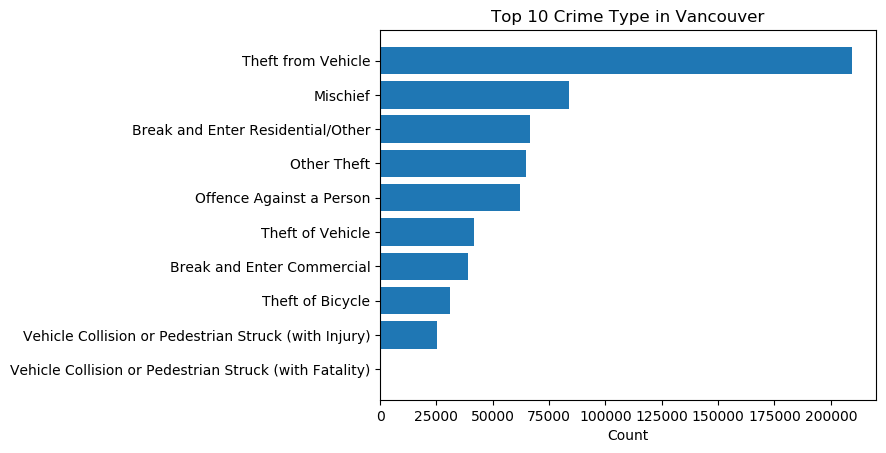

In [25]:
# Plot top 10 type of crime in Vancouver
df1 = df1.head(10)

plt.rcdefaults()
fig, ax = plt.subplots()

x_axis = df1['TYPE']
y_axis = df1['COUNT']
y_pos = np.arange(len(x_axis))

ax.barh(y_pos, y_axis, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(x_axis)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Top 10 Crime Type in Vancouver')

plt.show()

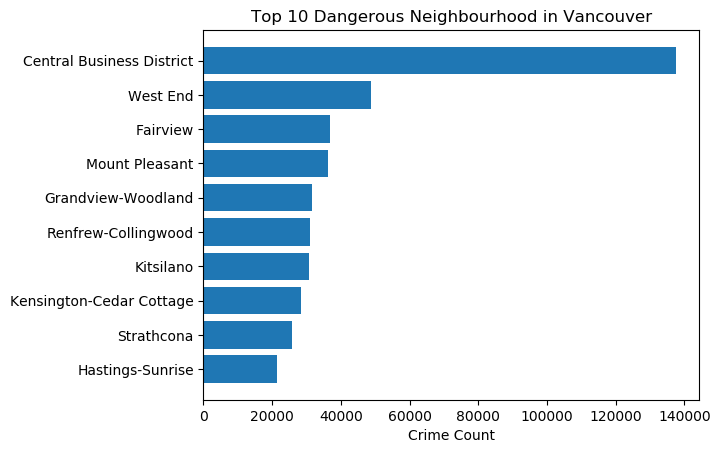

In [26]:
# Plot top 10 neighborhoods with the most number of crime
df2 = df.groupby('NEIGHBOURHOOD')['TYPE'].count().sort_values(ascending=False).reset_index(name='COUNT').head(10)

plt.rcdefaults()
fig, ax = plt.subplots()

x_axis = df2['NEIGHBOURHOOD']
y_axis = df2['COUNT']
y_pos = np.arange(len(x_axis))

ax.barh(y_pos, y_axis, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(x_axis)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Crime Count')
ax.set_title('Top 10 Dangerous Neighbourhood in Vancouver')

plt.show()

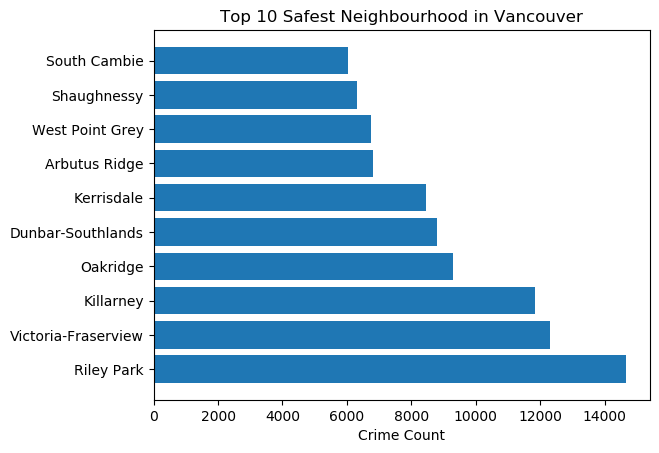

In [27]:
# Plot top 10 neighborhoods with the lowest number of crime in Vancouver
df3 = df.groupby('NEIGHBOURHOOD')['TYPE'].count().sort_values(ascending=True).reset_index(name='COUNT')
df3 = df3.iloc[2:].head(10)
fig, ax = plt.subplots()

x_axis = df3['NEIGHBOURHOOD']
y_axis = df3['COUNT']
y_pos = np.arange(len(x_axis))

ax.barh(y_pos, y_axis, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(x_axis)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Crime Count')
ax.set_title('Top 10 Safest Neighbourhood in Vancouver')

plt.show()

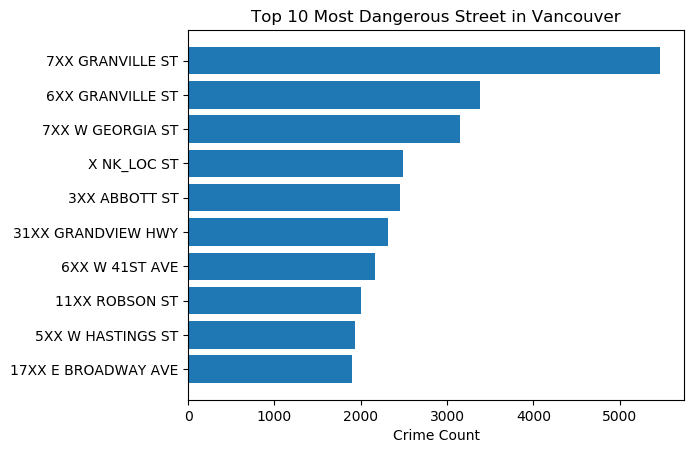

In [28]:
df4 = df.groupby('HUNDRED_BLOCK')['TYPE'].count().sort_values(ascending=False).reset_index(name='COUNT')
df4 = df4.loc[df4['HUNDRED_BLOCK']!='OFFSET TO PROTECT PRIVACY'].head(10)

fig, ax = plt.subplots()

x_axis = df4['HUNDRED_BLOCK']
y_axis = df4['COUNT']
y_pos = np.arange(len(x_axis))

ax.barh(y_pos, y_axis, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(x_axis)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Crime Count')
ax.set_title('Top 10 Most Dangerous Street in Vancouver')

plt.show()

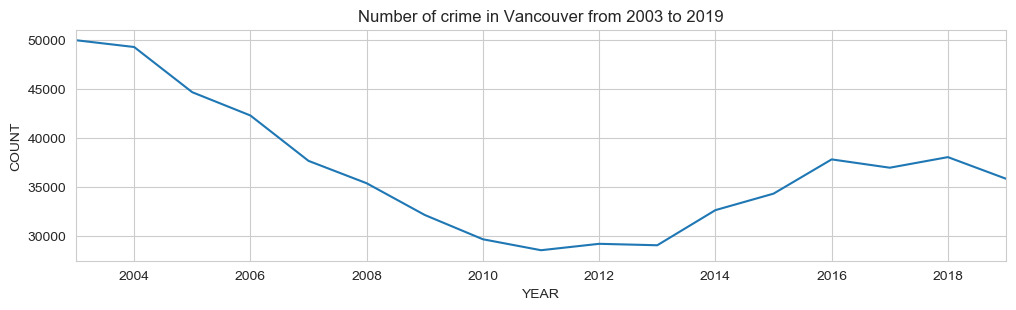

In [29]:
# Plot of crime in Vancouver over the years
df5 = df.groupby('YEAR').count()['TYPE'].reset_index(name='COUNT')
plt.figure(figsize=(12,3))
sns.set_style('whitegrid')
ax = sns.lineplot(x='YEAR', y='COUNT', data=df5)
ax.set_title('Number of crime in Vancouver from 2003 to 2019')
ax.set_xlim(2003, 2019)
plt.show()

The above figure shows that the number of crime in Vancouver decreased drastically from 2003 and reached the lowest point in 2011, but it has started increasing again since 2013. 

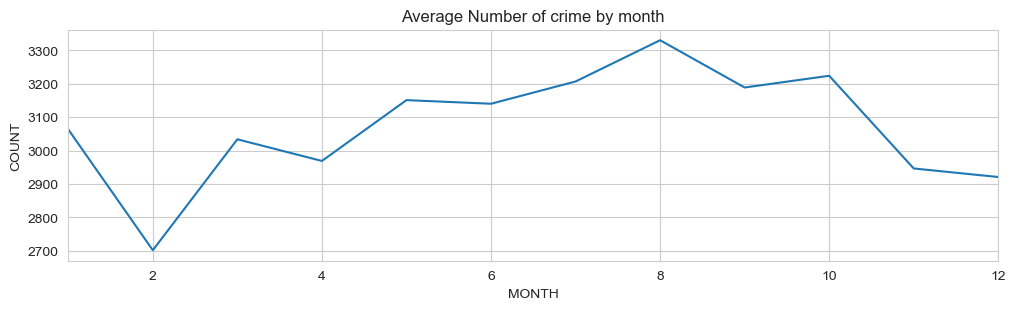

In [30]:
# Plot average number of crime by month
df6 = df.groupby(['YEAR','MONTH']).count()['TYPE'].reset_index(name='COUNT') # count crime by month for each year
df6 = df6.groupby('MONTH').mean()['COUNT'].reset_index() # average crime number by month
plt.figure(figsize=(12,3))
sns.set_style('whitegrid')
ax = sns.lineplot(x='MONTH', y='COUNT', data=df6) 
ax.set_title('Average Number of crime by month')
ax.set_xlim(1,12)
plt.show()

On average the number of crime is higher in summmer months (June-September) than in winter. August has the highest number of crime, while Februray has the lowest number of crime.

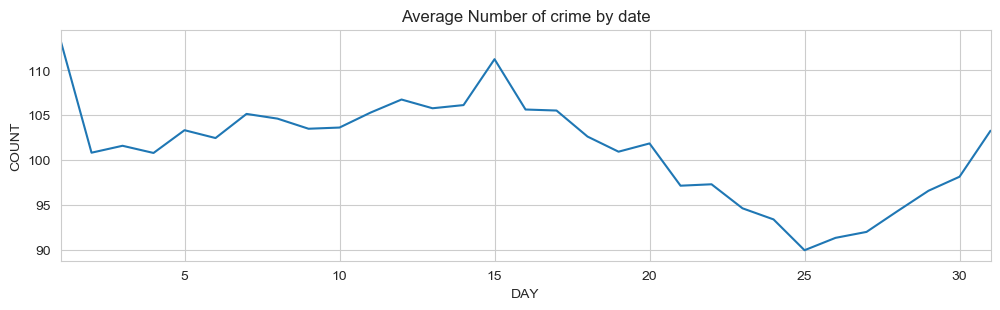

In [31]:
# Plot average number of crime by date
df7 = df.groupby(['YEAR','MONTH','DAY']).count()['TYPE'].reset_index(name='COUNT').groupby('DAY').mean()['COUNT'].reset_index()
plt.figure(figsize=(12,3))
sns.set_style('whitegrid')
ax = sns.lineplot(x='DAY', y='COUNT', data=df7) 
ax.set_title('Average Number of crime by date')
ax.set_xlim(1, 31)
plt.show()

The number of crime is higher in the beginning and middle of the month.

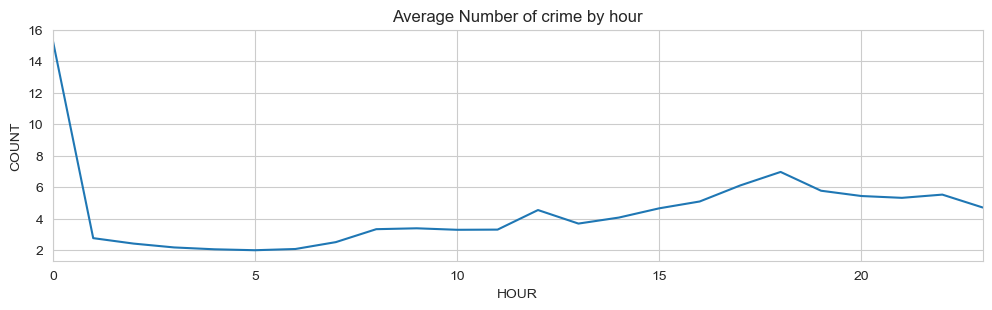

In [32]:
# Plot average number of crime by hour
df8 = df.groupby(['YEAR','MONTH','DAY','HOUR']).count()['TYPE'].reset_index(name='COUNT').groupby('HOUR').mean()['COUNT'].reset_index()
plt.figure(figsize=(12,3))
sns.set_style('whitegrid')
ax = sns.lineplot(x='HOUR', y='COUNT', data=df8) 
ax.set_title('Average Number of crime by hour')
ax.set_xlim(0, 23)
plt.show()

The number of crime increased in the evening and reached a peak at midnight. 

In [33]:
# Number of crime by crime types over the years
df9 = df.groupby(['YEAR', 'TYPE']).count()['MONTH'].unstack().reset_index()
df9.columns.name = None
df9

,YEAR,Break and Enter Commercial,Break and Enter Residential/Other,Homicide,Mischief,Offence Against a Person,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury)
0,2003,3197,6883,18,6391,3518,2582,17744,1418,6361,25,1856
1,2004,3283,6538,22,5601,3802,2605,18204,1230,6102,22,1892
2,2005,2639,5542,22,5062,3779,2611,16554,1416,5031,33,2003
3,2006,2844,5674,17,5184,4345,2966,14734,1467,3682,20,1388
4,2007,2436,4996,19,4810,4413,3024,12226,1203,3305,24,1239
5,2008,2224,4432,18,5276,4225,3142,11298,1176,2420,17,1186
6,2009,1858,3497,18,4429,3893,3662,10007,1641,1882,14,1278
7,2010,1657,3270,10,4506,3745,3432,8612,1668,1467,10,1327
8,2011,1749,3231,15,4828,3883,3562,7435,1517,1094,11,1262
9,2012,1687,3311,8,4243,3801,3630,8097,1817,1151,18,1477


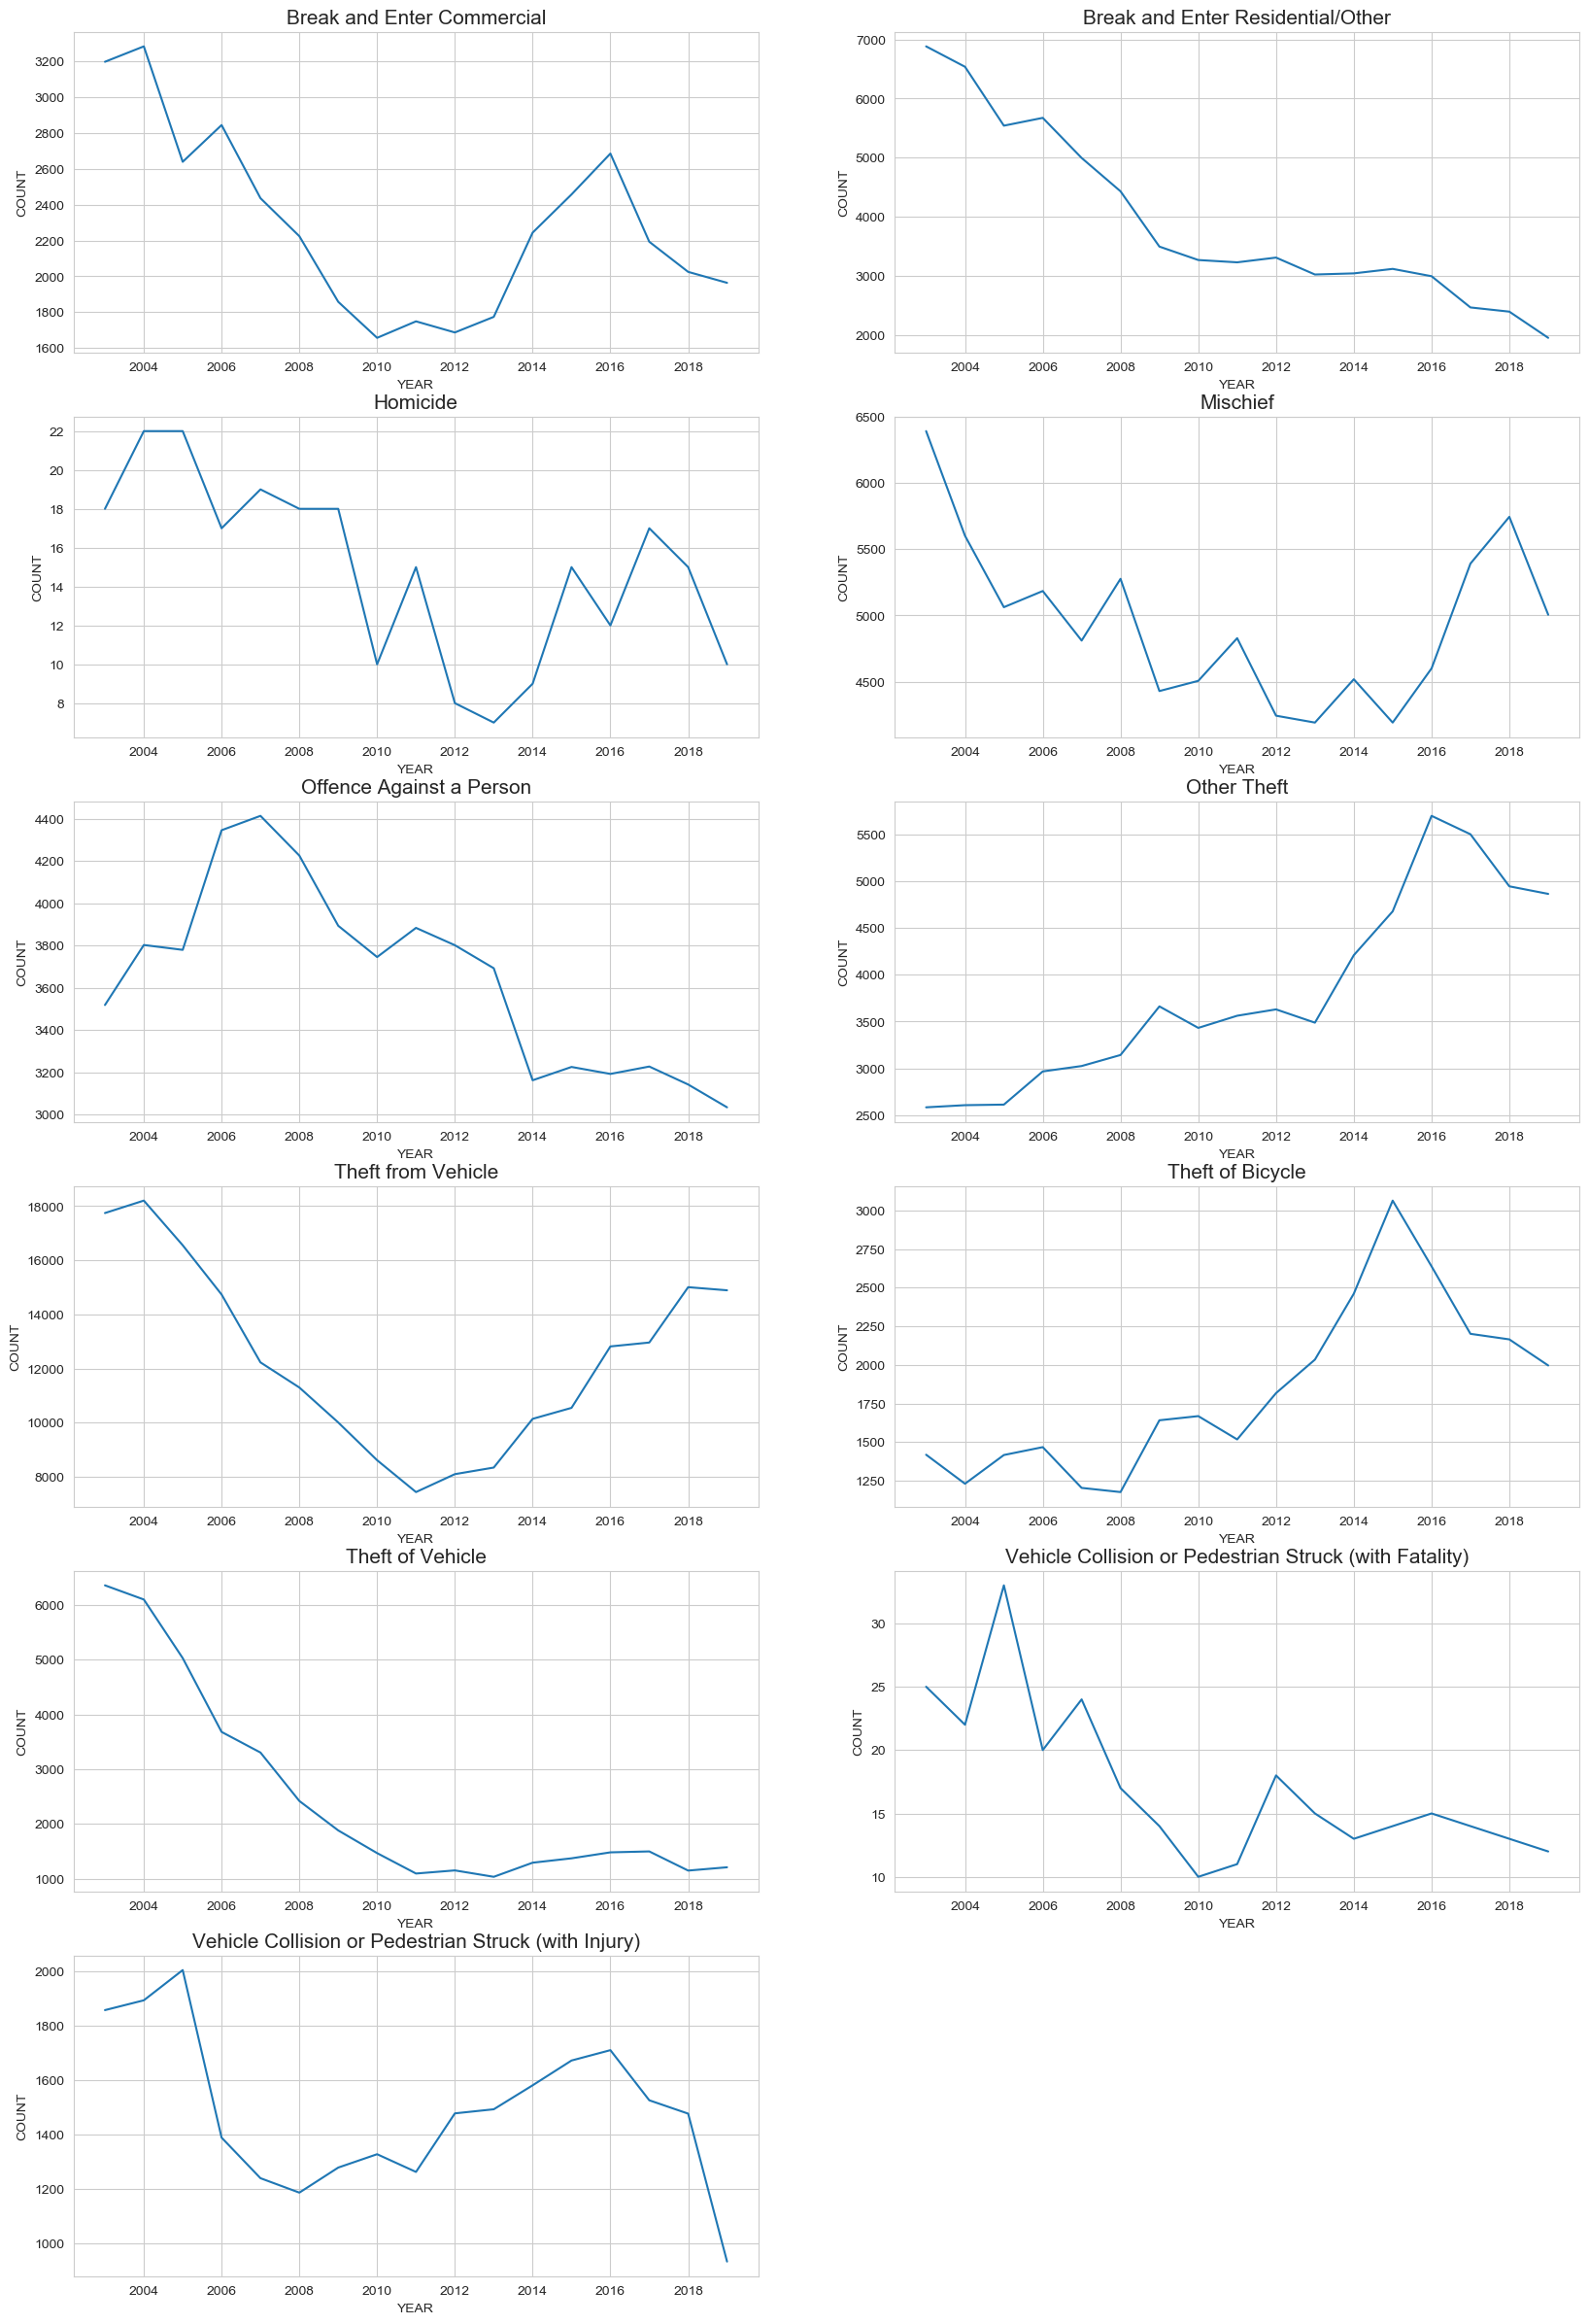

In [34]:
# Plot of crime types from 2003 to 2019
crime_types = sorted(df['TYPE'].unique())
fig = plt.figure(figsize=(20,30))
for i in range(len(crime_types)):
    ax = plt.subplot(6,2,i+1)
    sns.lineplot(x='YEAR', y=crime_types[i], data=df9)
    ax.set_ylabel('COUNT')
    ax.set_title(crime_types[i], fontsize=15)
    
plt.show()

From the above plots, we can observe that:
- Theft from vehicle, mischief, and break and enter commercial decreased from 2003 to the lowest level in 2010-2012 period, but started to increase again after 2012. 
- Theft of bicycle and other theft are in a general upward trend over the years.
- Other crime types are in a general downward trend over the years.